In [3]:
# pip install tensorflow

     |████████████████████████████████| 320.4 MB 16 kB/s s eta 0:00:01
     |████████████████████████████████| 10.6 MB 53.1 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 380 kB/s  eta 0:00:01
     |████████████████████████████████| 459 kB 58.8 MB/s eta 0:00:01
     |████████████████████████████████| 3.8 MB 59.1 MB/s eta 0:00:01
     |████████████████████████████████| 127 kB 65.4 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 112 kB/s  eta 0:00:01
     |████████████████████████████████| 114 kB 70.3 MB/s eta 0:00:01
     |████████████████████████████████| 779 kB 50.2 MB/s eta 0:00:01
     |████████████████████████████████| 96 kB 590 kB/s  eta 0:00:01
     |████████████████████████████████| 155 kB 67.9 MB/s eta 0:00:01
     |████████████████████████████████| 147 kB 68.7 MB/s eta 0:00:01
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4830 sha256=d0dcb83078d4ec5883417a3507983352b43ac65cd71da455b61f11ffd2db2400
  Stored in direc

In [3]:
pip install matplotlib

  Using cached matplotlib-3.3.3-cp36-cp36m-manylinux1_x86_64.whl (11.6 MB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached kiwisolver-1.3.1-cp36-cp36m-manylinux1_x86_64.whl (1.1 MB)
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

  Using cached seaborn-0.11.0-py3-none-any.whl (283 kB)
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
cd ..

/root/Artist-Classification


In [24]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import *

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import Model
from tensorflow.keras import layers

In [6]:
pwd

'/root/Artist-Classification'

In [7]:
train_path = 'images/subsplit/train'
valid_path = 'images/subsplit/test'
test_path = 'images/subsplit/val'

In [8]:
os.path.exists(train_path)

True

In [9]:
ls images/subsplit/train

Contemporary/  Impressionism/       Renaissance_baroque/
Fauvism/       Post-Impressionism/  Rococo/


In [10]:
classlist = ['Contemporary','Impressionism','Renaissance_baroque','Fauvism','Post-Impressionism','Rococo']
batch_size = 8

In [11]:
AugmentGenerator = ImageDataGenerator(rescale = 1./255.,
                                      rotation_range = 40,
                                      width_shift_range = 0.2,
                                      height_shift_range = 0.2,
                                      shear_range = 0.2,
                                      zoom_range = 0.2,
                                      horizontal_flip = True)

aug_batches = AugmentGenerator.flow_from_directory(train_path,
                                                   target_size=(224, 224),
                                                   classes=classlist,
                                                   batch_size=batch_size)

Found 3124 images belonging to 6 classes.


In [12]:
train_batches =  ImageDataGenerator().flow_from_directory(train_path,
                                                                           target_size=(224, 224),
                                                                           classes=classlist,
                                                                           batch_size=batch_size)

valid_batches = ImageDataGenerator().flow_from_directory(valid_path,
                                                                          target_size=(224, 224),
                                                                          classes=classlist,
                                                                          batch_size=batch_size)

test_batches = ImageDataGenerator().flow_from_directory(test_path,
                                                                         target_size=(224, 224),
                                                                         classes=classlist,
                                                                         batch_size=batch_size)

Found 3124 images belonging to 6 classes.
Found 630 images belonging to 6 classes.
Found 414 images belonging to 6 classes.


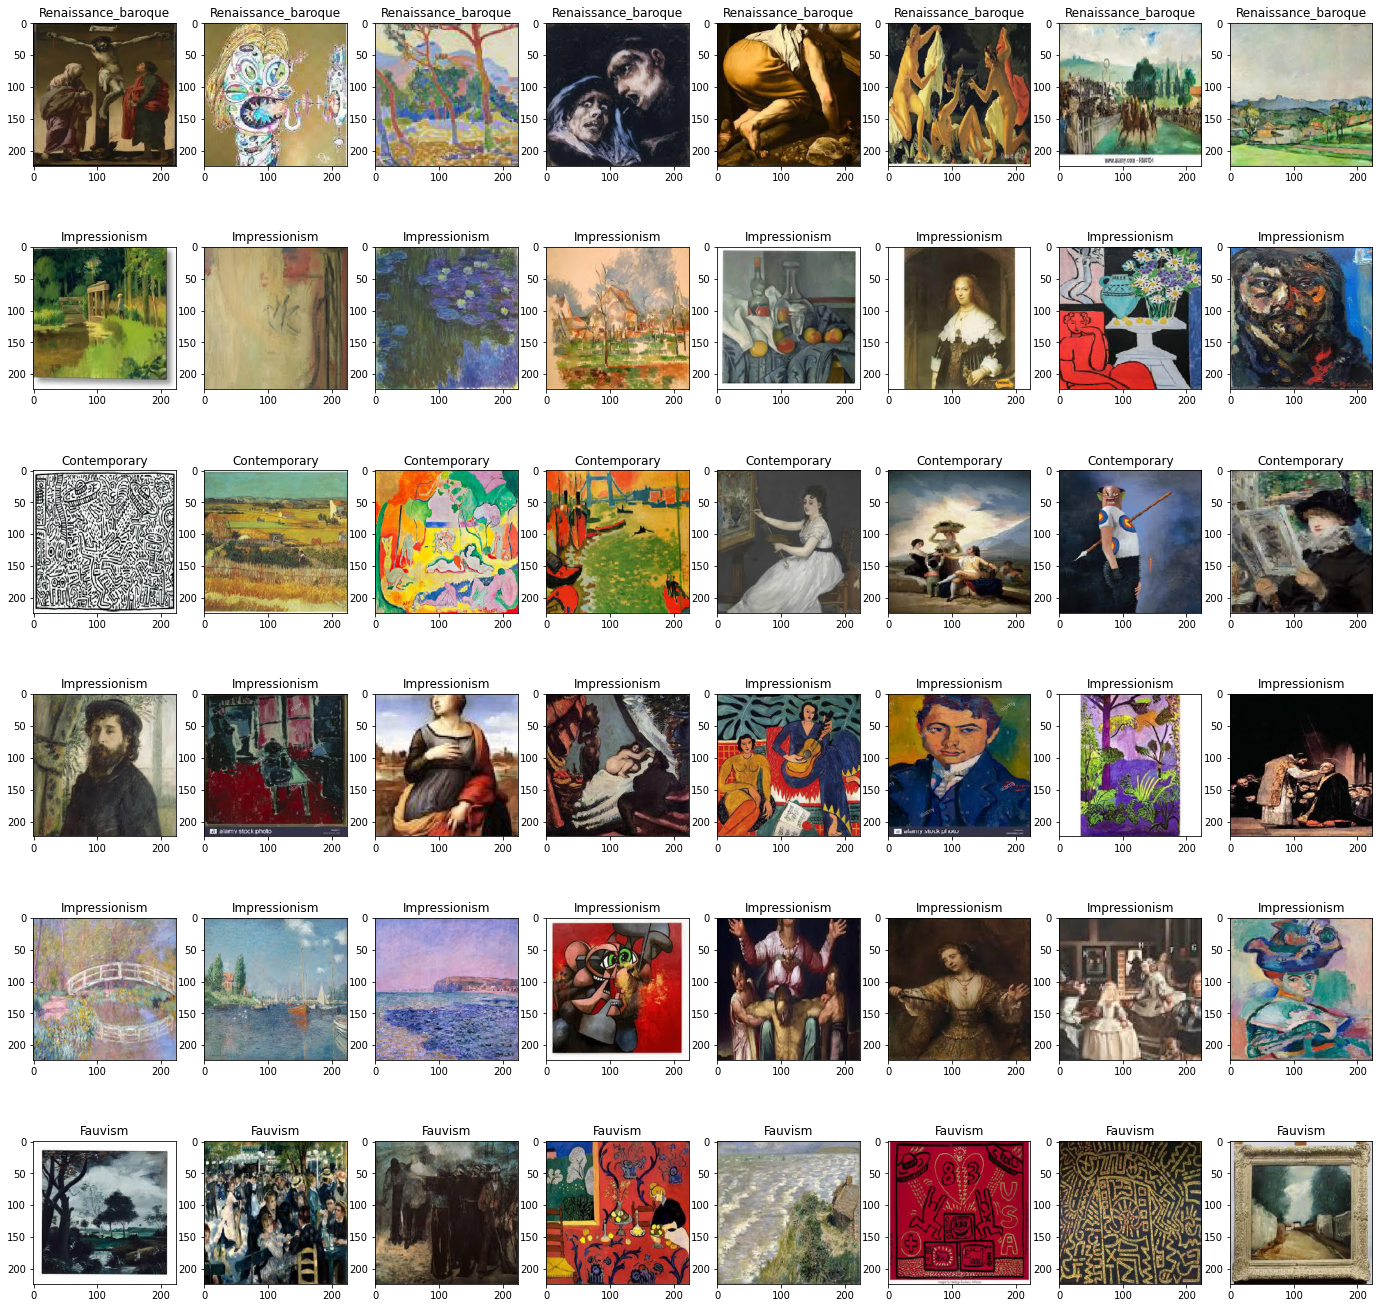

In [13]:
def image_plot(rows, batch, cols=batch_size, classlist=classlist):   
    
    fig, axs = plt.subplots(rows,cols,figsize=(cols*3,rows*4))

    for i in range(rows):
        
        images, labels = next(batch)
        
        for j, pic in enumerate(images):
            if rows > 1:
                axs[i,j].imshow(pic/255)
                axs[i,j].set_title(classlist[labels.argmax()])
            
            else:
                axs[j].imshow(pic/255)
                axs[j].set_title(classlist[labels.argmax()])

image_plot(rows=6, batch=train_batches)

In [14]:
from tensorflow.keras.applications.vgg19 import VGG19

In [15]:
vgg19_model = VGG19(input_shape = (224, 224, 3),
                    include_top = True,
                    weights = 'imagenet')

In [16]:
for layer in vgg19_model.layers[:]:
    layer.trainable = False

In [21]:
Modelx = Sequential()
for layer in vgg19_model.layers[:-1]:
    Modelx.add(layer)

num_classes = len(classlist)

Modelx.add(layers.Dense(1024, activation='relu'))

Modelx.add(layers.Dropout(0.25))

Modelx.add(layers.Dense(num_classes, activation='softmax'))

In [22]:
RMS =  tf.keras.optimizers.RMSprop(lr=0.0001)
SGD = tf.keras.optimizers.SGD(learning_rate=0.001)

Modelx.compile(optimizer = SGD,
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

In [47]:
Modelx.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [25]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

Modelx.fit(train_batches,
           validation_data=valid_batches,
           epochs=50,
           verbose=1,
           callbacks=[es],
           workers=-1,
           use_multiprocessing=True)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 391 steps, validate for 79 steps
Epoch 1/50
391/391 [==============================] - 44s 112ms/step - loss: 1.4268 - accuracy: 0.4789 - val_loss: 1.0830 - val_accuracy: 0.6127
Epoch 2/50
391/391 [==============================] - 31s 78ms/step - loss: 0.9259 - accuracy: 0.6540 - val_loss: 0.9244 - val_accuracy: 0.6571
Epoch 3/50
391/391 [==============================] - 31s 79ms/step - loss: 0.7371 - accuracy: 0.7289 - val_loss: 0.9192 - val_accuracy: 0.6810
Epoch 4/50
391/391 [==============================] - 31s 80ms/step - loss: 0.6304 - accuracy: 0.7673 - val_loss: 0.8623 - val_accuracy: 0.6778
Epoch 5/50
391/391 [==============================] - 31s 80ms/step - loss: 0.5372 - accuracy: 0.8079 - val_loss: 0.8699 - val_accuracy: 0.6810
Epoch 6/50
391/391 [==============================] - 32s 81ms/step - loss: 0.4718 - accuracy: 0.8374 - val_loss: 0.8400 - val_accuracy: 0.6714
Epoch 7/50
391/391 [==============================] - 30s 77ms/step - loss: 0.4284 - accurac

In [29]:
def image_plot_predict(rows, batch, model, cols=batch_size, classlist=classlist):   
    
    fig, axs = plt.subplots(rows,cols,figsize=(cols*3,rows*4))

    for i in range(rows):
        
        images, labels = next(batch)
        predictions = model.predict(images)
        
        for j, pic in enumerate(images):
            
            title = 'pred' + ' ' + \
            classlist[predictions[j].argmax()] + ' ' + \
            '\n' + \
            'actual' + ' ' + \
            classlist[labels[j].argmax()]
            
            if rows > 1:
                axs[i,j].imshow(pic/255)
                axs[i,j].set_title(title,fontsize=12)
            
            else:
                axs[j].imshow(pic/255)
                axs[j].set_title(title)

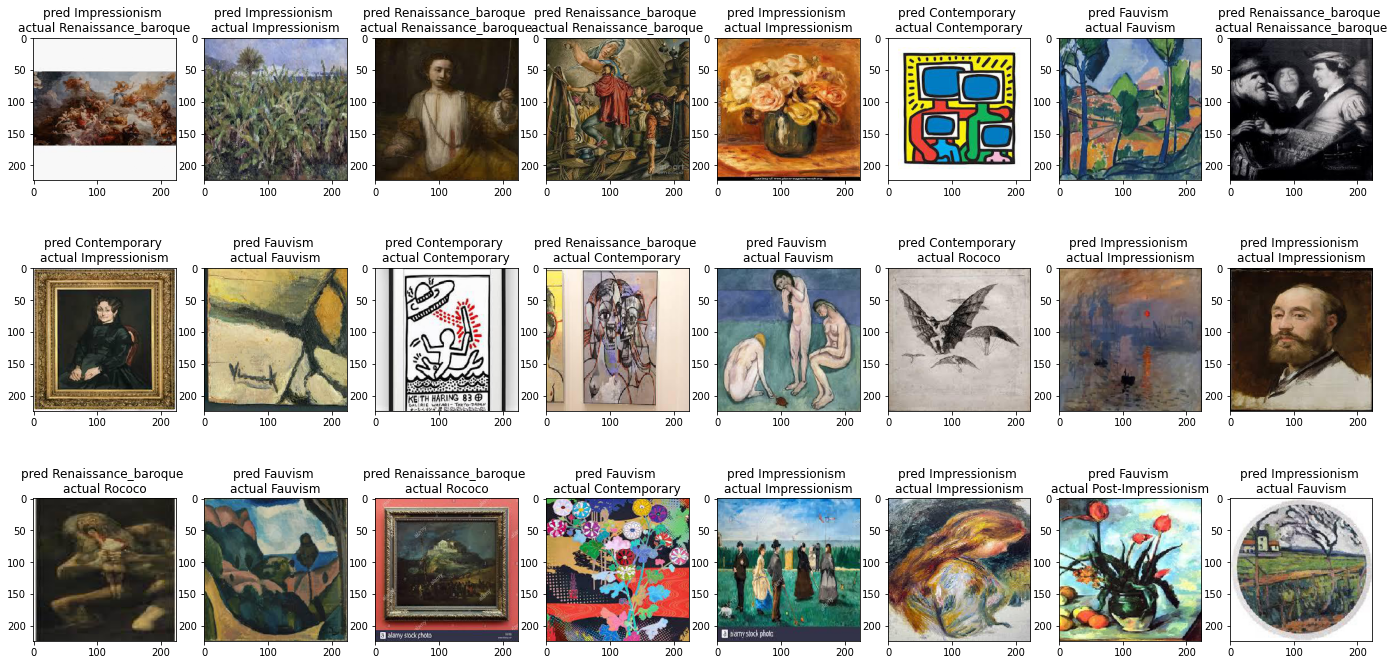

In [30]:
image_plot_predict(rows=3, batch=test_batches, model=Modelx)

In [33]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(vgg19_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer for classification
x = layers.Dense(num_classes, activation='softmax')(x)

model1 = tf.keras.models.Model(vgg19_model.input, x)

RMS =  tf.keras.optimizers.RMSprop(lr=0.0001)

model1.compile(optimizer = RMS,
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

In [31]:
def result(test_gen, model):
    pred_, actual_  = [], []  
    r = round(test_batches.n / test_batches.batch_size)

    for i in range(r):
        
        images, labels = next(test_gen)
        predictions = model.predict(images)
        
        for j, label in enumerate(labels):
            
            actual_.append(label.argmax())
            pred_.append(predictions[j].argmax())
            
    return pred_, actual_

In [32]:
test_batches.class_indices, test_batches.n

({'Contemporary': 0,
  'Impressionism': 1,
  'Renaissance_baroque': 2,
  'Fauvism': 3,
  'Post-Impressionism': 4,
  'Rococo': 5},
 414)

In [33]:
pred, actual = result(test_batches, Modelx)

In [34]:
len(pred)

414

<AxesSubplot:>

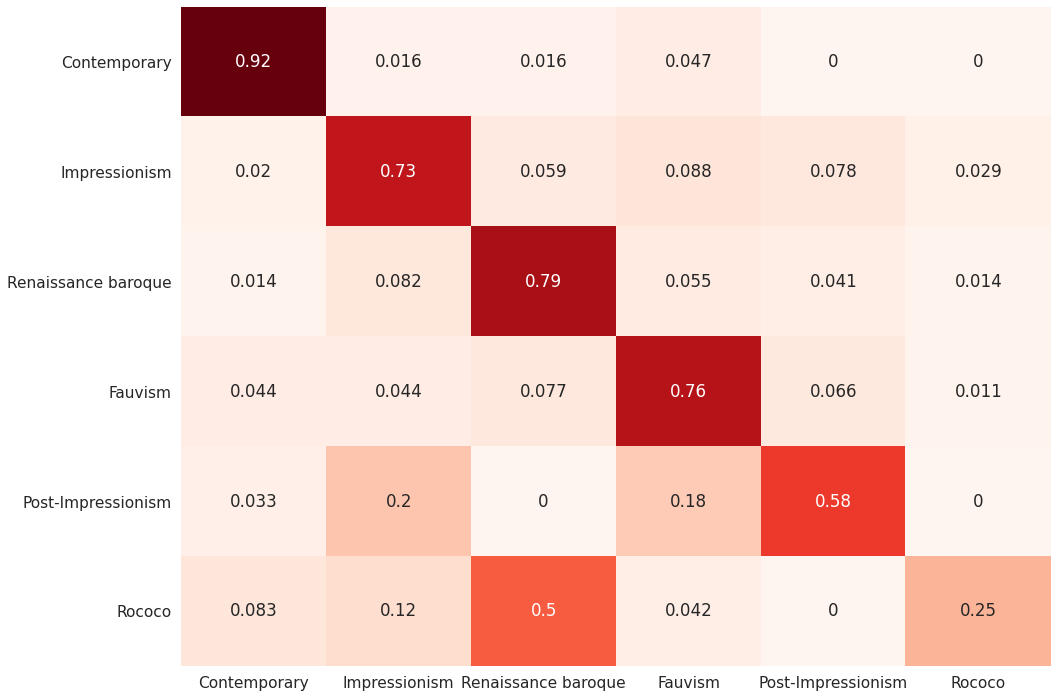

In [46]:
plt.figure(figsize=(15,10), tight_layout=True, frameon=False)

confusion = confusion_matrix(actual, pred, normalize='true')

name = [string.replace('_', ' ') for string in classlist]

sns.set(font_scale=1.4)

sns.heatmap(confusion, annot=True, yticklabels=name, xticklabels=name, cbar=False, cmap='Reds')

In [36]:
def missed(test_gen, model, classlist=classlist):

    wrong, ximages, correct = [], [], []
    r = round(test_gen.n / test_gen.batch_size)
    idx = 0
    
    for i in range(r):
    
        images, labels = next(test_gen)
        predictions = model.predict(images)
    
        for j, label in enumerate(labels):
            idx += 1
    
            actual_ = label.argmax()
            pred_ = predictions[j].argmax()    
    
            if actual_ != pred_:
                correct.append(classlist[actual_].replace('_', ' '))
                wrong.append(classlist[pred_].replace('_', ' '))
                ximages.append(images[j])
                
    return wrong, ximages, correct

In [37]:
wrong, ximages, correct = missed(test_batches, Modelx)

In [38]:
len(wrong), len(ximages), len(correct)

(117, 117, 117)

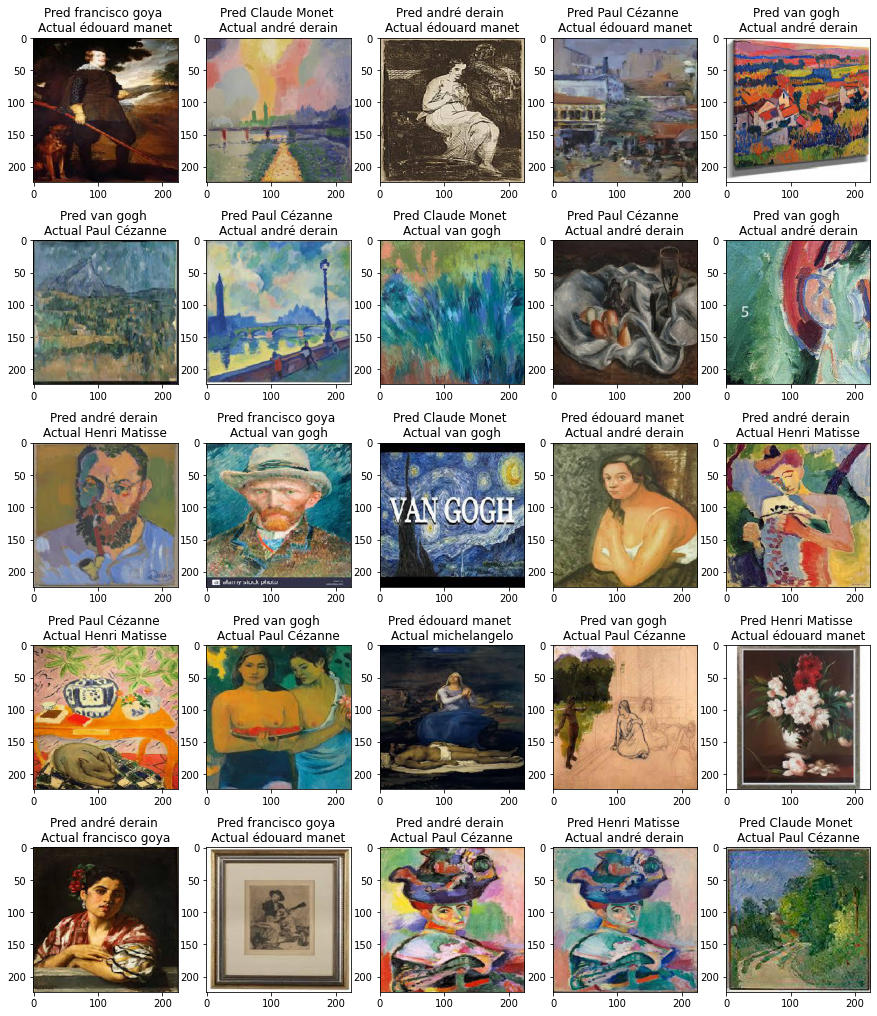

In [66]:
fig, axs = plt.subplots(5, 5, figsize=(15, 18))

k = 0
for i in range(5):
    for j in range(5):
        axs[i,j].imshow(ximages[k]/255)
        title = f"Pred {wrong[k]} \nActual {correct[k]}"
        axs[i,j].set_title(title)
        k+=1

In [67]:
from sklearn.metrics import classification_report

In [68]:
metrics = classification_report(np.array(actual),
                                np.array(pred),
                                labels = np.unique(actual),
                                target_names=name,
                                output_dict=True)

In [81]:
metrics_df = pd.DataFrame(metrics).T.iloc[:-3,:2]
metrics_df

precision    recall
Claude Monet     0.605263  0.621622
Paul Cézanne     0.660714  0.660714
francisco goya   0.714286  0.666667
van gogh         0.562500  0.600000
Henri Matisse    0.500000  0.600000
andré derain     0.513514  0.387755
michelangelo     0.631579  0.705882
édouard manet    0.613636  0.675000

In [327]:
np.array(metrics_df)

array([[5.00000000e-01, 6.05263158e-01, 5.47619048e-01, 3.80000000e+01],
       [4.05797101e-01, 5.00000000e-01, 4.48000000e-01, 5.60000000e+01],
       [5.31250000e-01, 6.29629630e-01, 5.76271186e-01, 2.70000000e+01],
       [4.54545455e-01, 3.44827586e-01, 3.92156863e-01, 2.90000000e+01],
       [5.13513514e-01, 6.78571429e-01, 5.84615385e-01, 2.80000000e+01],
       [7.00000000e-01, 1.66666667e-01, 2.69230769e-01, 4.20000000e+01],
       [8.75000000e-01, 3.18181818e-01, 4.66666667e-01, 2.20000000e+01],
       [3.83333333e-01, 5.47619048e-01, 4.50980392e-01, 4.20000000e+01],
       [4.71830986e-01, 4.71830986e-01, 4.71830986e-01, 4.71830986e-01],
       [5.45429925e-01, 4.73844917e-01, 4.66942539e-01, 2.84000000e+02],
       [5.22459804e-01, 4.71830986e-01, 4.56740004e-01, 2.84000000e+02]])

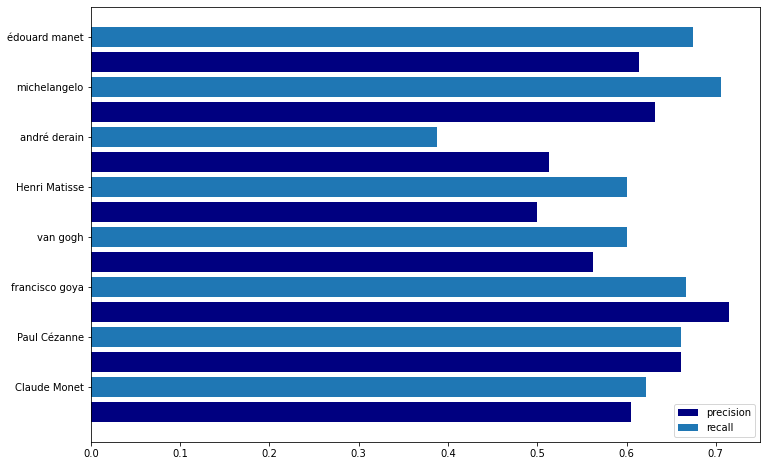

In [120]:
plt.figure(figsize=(12,8))
plt.barh(np.arange(0,15,2), metrics_df.precision, color='navy')
plt.barh(np.arange(1,17,2), metrics_df.recall)
plt.yticks(ticks=np.arange(1,17,2), labels=name)
plt.legend(['precision','recall'])

In [40]:
Modelx.save('Art6_Classifier_VGG19_model.h5')

In [121]:
from tensorflow.keras.applications.vgg16 import VGG16

vgg16_model = VGG16(input_shape = (224, 224, 3),
                    include_top = False,
                    weights = 'imagenet')

for layer in vgg16_model.layers[:]:
    layer.trainable = False

In [122]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(vgg16_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)

# Add a dropout rate of 0.25
x = layers.Dropout(0.25)(x)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)

# Add a dropout rate of 0.25
x = layers.Dropout(0.25)(x)

# Add a final sigmoid layer for classification
x = layers.Dense(num_classes, activation='softmax')(x)

modely = tf.keras.models.Model(vgg16_model.input, x)

SGD = tf.keras.optimizers.SGD(learning_rate=0.001)

modely.compile(optimizer = SGD,
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

In [123]:
modely.fit(train_batches, validation_data=valid_batches, epochs=25, verbose=1)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 253 steps, validate for 74 steps
Epoch 1/25
253/253 [==============================] - 18s 70ms/step - loss: 7.3618 - accuracy: 0.3371 - val_loss: 1.9940 - val_accuracy: 0.5043
Epoch 2/25
253/253 [==============================] - 17s 68ms/step - loss: 1.4179 - accuracy: 0.6797 - val_loss: 1.7337 - val_accuracy: 0.5453
Epoch 3/25
253/253 [==============================] - 18s 70ms/step - loss: 0.6575 - accuracy: 0.8168 - val_loss: 1.8905 - val_accuracy: 0.5316
Epoch 4/25
253/253 [==============================] - 18s 71ms/step - loss: 0.4034 - accuracy: 0.8847 - val_loss: 1.6286 - val_accuracy: 0.5863
Epoch 5/25
253/253 [==============================] - 18s 72ms/step - loss: 0.3170 - accuracy: 0.9282 - val_loss: 1.6535 - val_accuracy: 0.6051
Epoch 6/25
253/253 [==============================] - 18s 73ms/step - loss: 0.1788 - accuracy: 0.9495 - val_loss: 1.7127 - val_accuracy: 0.6034
Epoch 7/25
253/253 [==============================] - 19s 74ms/step - loss: 0.1568 - accuracy